In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [2]:
train = pd.read_csv("bigmart_train.csv")

In [3]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
train.shape

(8523, 12)

In [6]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
for x in train['Item_Fat_Content'].unique():
    print(x)

Low Fat
Regular
low fat
LF
reg


In [8]:
train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [12]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [13]:
train.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [14]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [15]:
train['Item_Weight'].isna().sum()

0

In [16]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

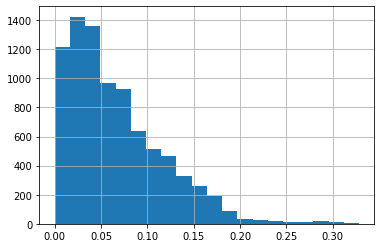

In [17]:
train['Item_Visibility'].hist(bins=20)

In [18]:
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

In [19]:
Q3

0.0945852925

In [20]:
filterd_train = train.query('(@Q1 - @IQR * 1.5) <= Item_Visibility <= (@Q3 + @IQR * 1.5)')

In [21]:
filterd_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
filterd_train['Outlet_Age'] = 2018 - filterd_train['Outlet_Establishment_Year']

C:\Users\eahkhan\AppData\Local\Temp/ipykernel_5420/3882086507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterd_train['Outlet_Age'] = 2018 - filterd_train['Outlet_Establishment_Year']


In [23]:
filterd_train['Outlet_Age']

0       19
1        9
2       19
3       20
4       31
        ..
8518    31
8519    16
8520    14
8521     9
8522    21
Name: Outlet_Age, Length: 8379, dtype: int64

In [24]:
filterd_train.shape , train.shape

((8379, 13), (8523, 12))

In [25]:
train = filterd_train

In [26]:
train['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [27]:
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'],[0.00, 0.065, 0.13, 0.2], labels=['Low Viz','Viz','High Viz'])

In [28]:
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].fillna('Low Viz')

In [29]:
train['Item_Visibility_bins'].unique()

['Low Viz', 'Viz', 'High Viz']
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [30]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [31]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat', 'LF'],'Low Fat')

In [32]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg','Regular')

In [33]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [34]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()

In [35]:
train['Item_Fat_Content'] = le1.fit_transform(train['Item_Fat_Content'])

In [36]:
train['Item_Visibility_bins'] = le2.fit_transform(train['Item_Visibility_bins'])

In [37]:
train['Outlet_Size'] = le3.fit_transform(train['Outlet_Size'])

In [38]:
train['Outlet_Location_Type'] = le4.fit_transform(train['Outlet_Location_Type'])

In [39]:
le1.inverse_transform(train['Item_Fat_Content'])

array(['Low Fat', 'Regular', 'Low Fat', ..., 'Low Fat', 'Regular',
       'Low Fat'], dtype=object)

In [40]:
dummy = pd.get_dummies(train['Outlet_Type'])

In [41]:
dummy

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
8518,0,1,0,0
8519,0,1,0,0
8520,0,1,0,0
8521,0,0,1,0


In [42]:
train = pd.concat([train,dummy],axis =  1)

In [43]:
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Establishment_Year'], axis=1)

In [44]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [45]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,19,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,9,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,19,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,20,1,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,31,1,0,1,0,0


In [46]:
X = train.drop('Item_Outlet_Sales', axis=1)

In [47]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,19,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,9,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,19,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,20,1,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,31,1,0,1,0,0


In [48]:
y = train['Item_Outlet_Sales']

In [49]:
X.head() , y.head()

(   Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
 0         9.30                 0         0.016047  249.8092            1   
 1         5.92                 1         0.019278   48.2692            1   
 2        17.50                 0         0.016760  141.6180            1   
 3        19.20                 1         0.000000  182.0950            1   
 4         8.93                 0         0.000000   53.8614            0   
 
    Outlet_Location_Type  Outlet_Age  Item_Visibility_bins  Grocery Store  \
 0                     0          19                     1              0   
 1                     2           9                     1              0   
 2                     0          19                     1              0   
 3                     2          20                     1              1   
 4                     2          31                     1              0   
 
    Supermarket Type1  Supermarket Type2  Supermarket Type3  
 0        

In [50]:
test = pd.read_csv('bigmart_test.csv')

In [51]:
test['Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [52]:
test['Item_Visibility_bins'] = pd.cut(test['Item_Visibility'],[0.00, 0.065, 0.13, 0.2], labels=['Low Viz','Viz','High Viz'])

In [53]:
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].fillna('Low Viz')

In [54]:
test['Item_Visibility_bins'].unique()

['Low Viz', 'Viz', 'High Viz']
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [55]:
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].replace(np.nan,'Low Viz',regex=True)

In [56]:
test['Item_Visibility_bins'].unique()

['Low Viz', 'Viz', 'High Viz']
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [57]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg','Regular')

In [62]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat', 'LF'],'Low Fat')

In [63]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [64]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [65]:
test['Item_Fat_Content'] = le1.transform(test['Item_Fat_Content'])
test['Item_Visibility_bins'] = le2.transform(test['Item_Visibility_bins'])
test['Outlet_Size'] = le3.transform(test['Outlet_Size'])
test['Outlet_Location_Type'] = le4.transform(test['Outlet_Location_Type'])

In [66]:
le1.inverse_transform(train['Item_Fat_Content'])

array(['Low Fat', 'Regular', 'Low Fat', ..., 'Low Fat', 'Regular',
       'Low Fat'], dtype=object)

In [67]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

In [79]:
lm1 = LinearRegression()

In [80]:
lm1.fit(xtrain,ytrain)

LinearRegression()

In [82]:
lm1.coef_ , lm1.intercept_

(array([    3.32565903,    27.49948402,  -196.15278716,    15.96531149,
           16.76148752,     8.04121542,    -2.28120926,    17.62300318,
        -1753.70556394,   219.18652367,  -122.33893469,  1656.85797495]),
 -193.53688992599245)

In [91]:
prediction1 = lm1.predict(xtest)

In [92]:
prediction1

array([-641.51753846, 2865.91850943, 1439.49768653, ..., 1913.04150594,
       3142.02636454, 4251.64050675])

In [93]:
print(sqrt(mean_squared_error(ytest,prediction1)))

1118.41605258575


In [94]:
from sklearn.linear_model import Ridge


In [95]:
lm2 = Ridge(alpha=0.001,normalize=True)

In [99]:
lm2.fit(xtrain,ytrain)

C:\Users\eahkhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.001, normalize=True)

In [100]:
prediction2 = lm2.predict(xtest)

In [103]:
print(sqrt(mean_squared_error(ytest,prediction2)))
print(r2_score(ytest,prediction2))

1118.3593685856831
0.548659756640925


In [104]:
from sklearn.linear_model import Lasso
lm3 = Lasso(alpha=0.001, normalize=True)

In [105]:
lm3.fit(xtrain,ytrain)

C:\Users\eahkhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.001, normalize=True)

In [112]:
prediction3 = lm3.predict(xtest)

In [113]:
prediction3

array([-641.25269374, 2865.98352593, 1439.79936816, ..., 1913.3159233 ,
       3141.60003812, 4251.58779732])

In [114]:
print(sqrt(mean_squared_error(ytest,prediction3)))
print(r2_score(ytest,prediction3))

1118.4095347838993
0.5486192642328969


In [115]:
from sklearn.linear_model import ElasticNet

In [116]:
lm4 = ElasticNet(alpha=0.001, normalize=True)

lm4.fit(xtrain,ytrain)

C:\Users\eahkhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(


ElasticNet(alpha=0.001, normalize=True)

In [117]:
prediction4 = lm4.predict(xtest)

In [118]:
print(sqrt(mean_squared_error(ytest,prediction4)))
print(r2_score(ytest,prediction4))

1429.147630115598
0.26295248675561855
